## **Universidad Peruana de Ciencias Aplicadas**
### CC235 - Procesamiento de Imágenes
### Segmentación de imágenes

---

In [2]:
import os
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, threshold_local
from skimage.measure import label, regionprops
from skimage.transform import rescale
from skimage.exposure  import equalize_hist
from termcolor import colored

### Obtener los datos

In [2]:
!wget -O img.zip https://drive.google.com/uc?id=1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT
!unzip img.zip
imagenes = os.listdir('img')

--2023-09-26 18:18:16--  https://drive.google.com/uc?id=1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT
Resolving drive.google.com (drive.google.com)... 108.177.111.138, 108.177.111.113, 108.177.111.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.111.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cj7vg72nd7l71ufvop4bc7bomcm4oif1/1695752250000/00643024047418248891/*/1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT?uuid=380a2b76-ca43-445d-a2e5-5947c898c719 [following]
--2023-09-26 18:18:17--  https://doc-0g-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cj7vg72nd7l71ufvop4bc7bomcm4oif1/1695752250000/00643024047418248891/*/1tmSCZICVi8dB7ncQJD8NDt7MmaX8S5UT?uuid=380a2b76-ca43-445d-a2e5-5947c898c719
Resolving doc-0g-8c-docs.googleusercontent.com (doc-0g-8c-docs.googleusercontent.com)... 209.85.145.132, 2607:f8b0:4001:c1e::84
Connecting to do

In [3]:
imagenes = os.listdir('img')

### Preprocesar la imágen, umbralizar y etiquetar componentes conectados

In [4]:
from scipy import ndimage
from skimage.segmentation import watershed
from skimage.feature import peak_local_max

['S_.1.90.jpeg', 'S_.2.70.jpeg', 'S_3.00.jpeg', 'S_.1.60.jpeg', 'S_.2.90.jpeg', '.ipynb_checkpoints', 'John.jpg', 'Resize.jpg', 'S_.1.80.jpeg', 'S_.2.80.jpeg', 'S_.1.70.jpeg', 'S_.2.60.jpeg']


<ipython-input-6-386267c2f494>:26: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=im_th)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


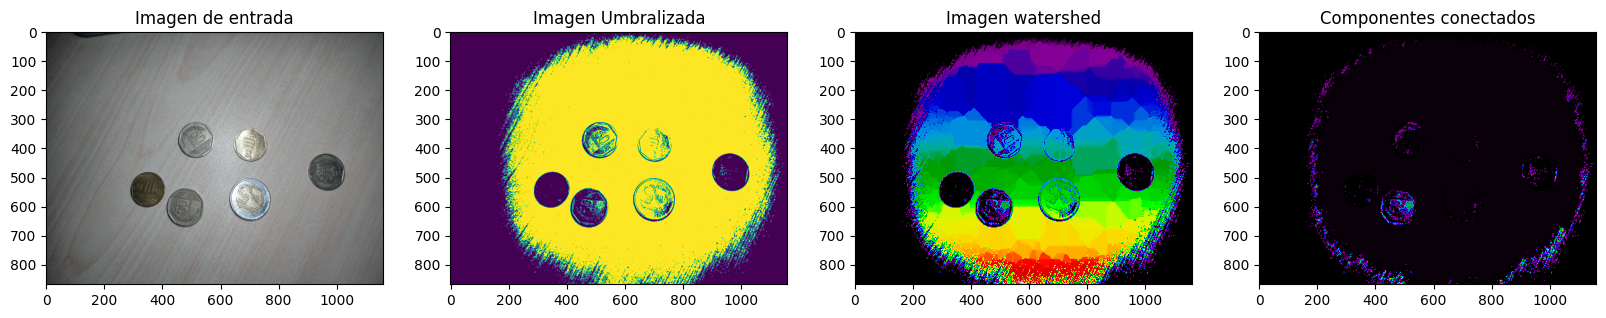

In [6]:
#@title Default title text { run: "auto" }
im_id = 7 #@param {type:"slider", min:0, max:8, step:1}

im_filename = imagenes[im_id]
print(imagenes)
im_path = os.path.join('img',im_filename)
im = imread(im_path)
im_grayscale = im[:,:,0]
im_grayscale -= im_grayscale.min()
im_grayscale = im_grayscale/im_grayscale.max()
th = threshold_otsu(im_grayscale)
im_th = im_grayscale>th
im_labeled = label(im_th)

#Mostrar imagenes
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title("Imagen de entrada")
plt.imshow(im)
plt.subplot(1,4,2)
plt.title("Imagen Umbralizada")
plt.imshow(im_th)
plt.subplot(1,4,3)
plt.title("Imagen watershed")
distance = ndimage.distance_transform_edt(im_th)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=im_th)
markers = ndimage.label(local_maxi)[0]
print(markers)
labels = watershed(-distance, markers, mask=im_th)
plt.imshow(labels, cmap='nipy_spectral')
plt.subplot(1,4,4)
plt.title("Componentes conectados")
plt.imshow(im_labeled, cmap='nipy_spectral')

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


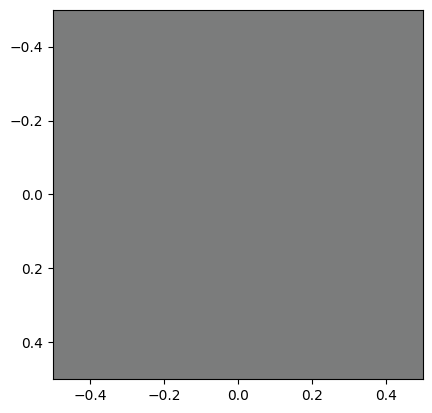

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


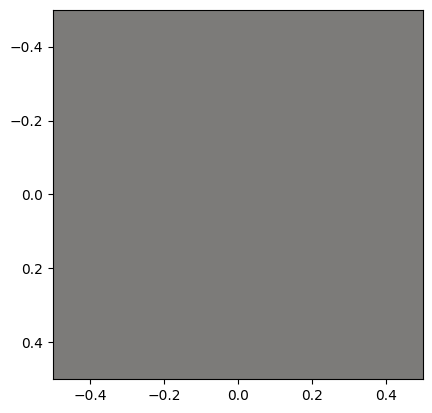

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


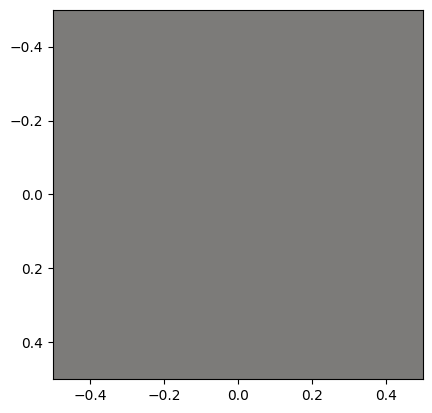

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


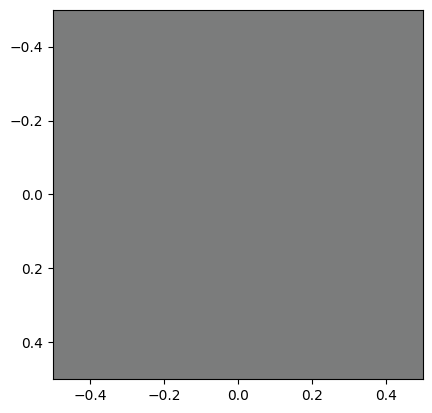

Area: 3
Procesando la región
Excentricidad de la region es: 0.816496580927726
Paso el filtro de circularidad


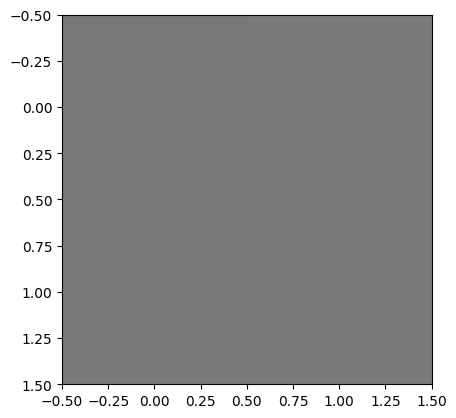

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


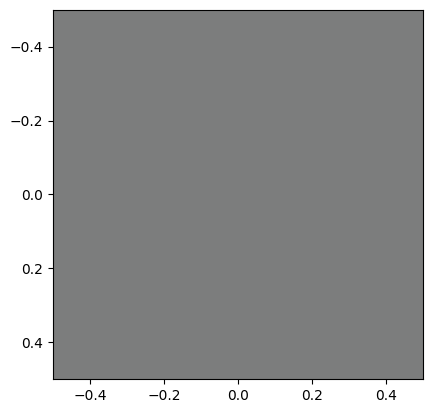

Area: 2
Procesando la región
Excentricidad de la region es: 1.0
Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


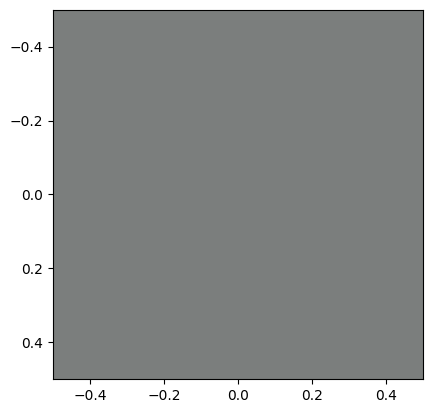

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


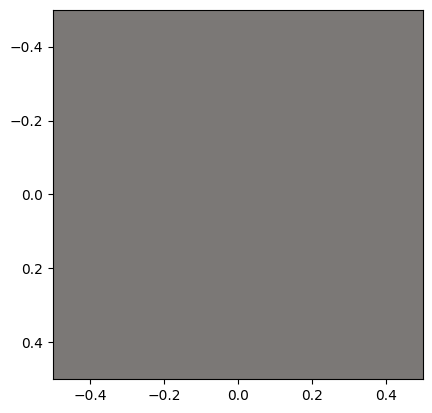

Area: 7
Procesando la región
Excentricidad de la region es: 0.9538059423779469
Paso el filtro de circularidad


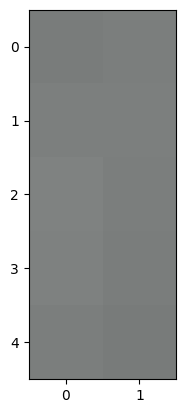

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


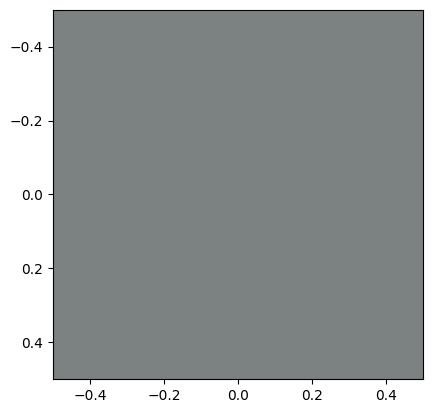

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


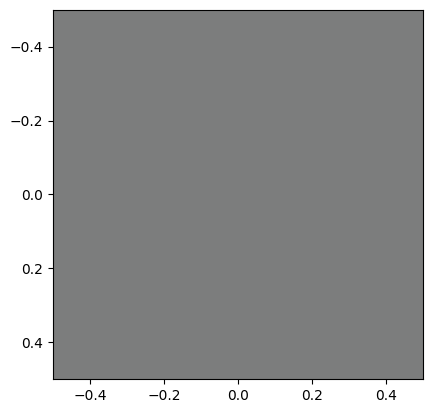

Area: 576124
Procesando la región
Excentricidad de la region es: 0.31824093922107216
Paso el filtro de circularidad


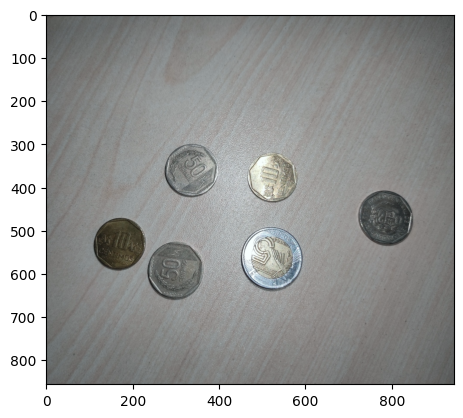

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


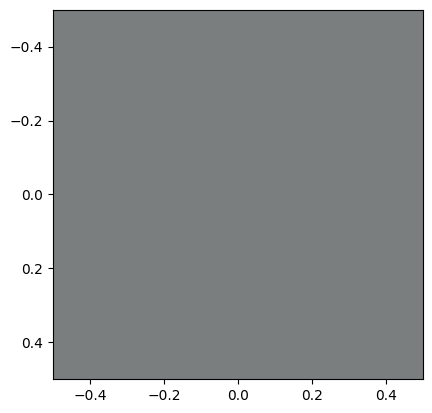

Area: 2
Procesando la región
Excentricidad de la region es: 1.0
Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


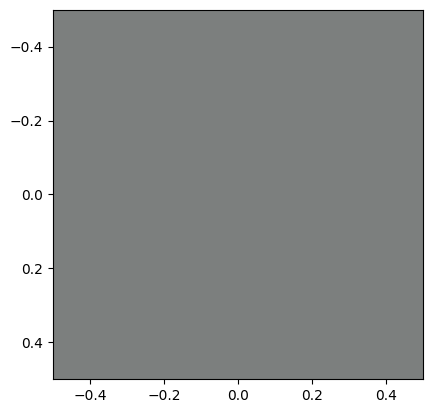

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


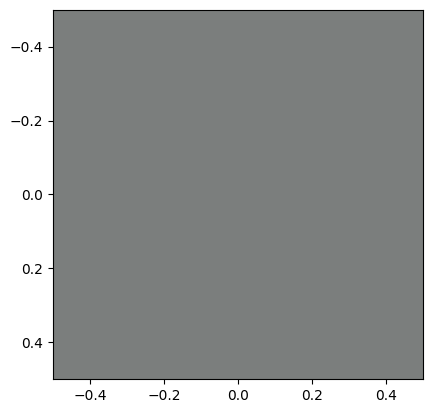

Area: 3
Procesando la región
Excentricidad de la region es: 0.816496580927726
Paso el filtro de circularidad


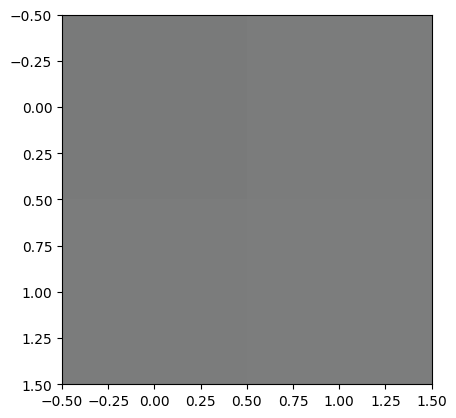

Area: 5
Procesando la región
Excentricidad de la region es: 0.8366600265340756
Paso el filtro de circularidad


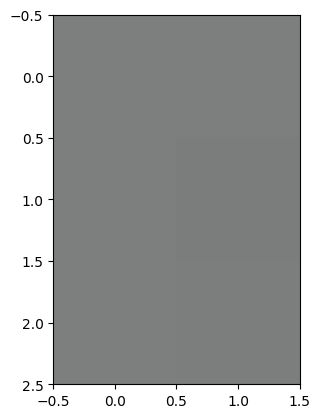

Area: 2
Procesando la región
Excentricidad de la region es: 1.0
Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


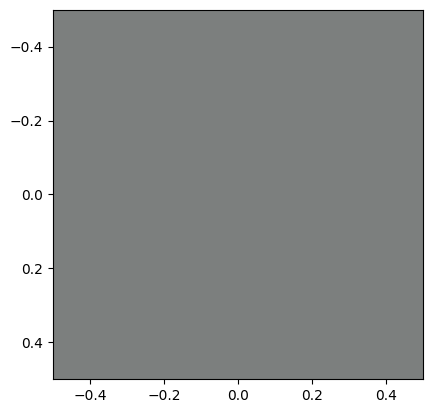

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


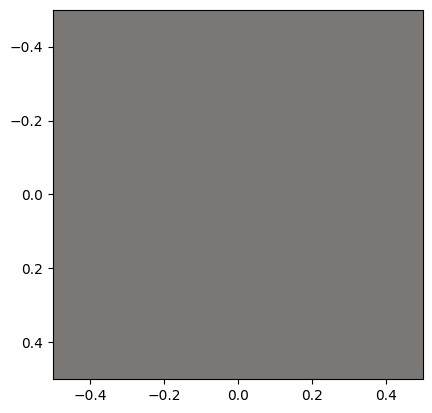

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


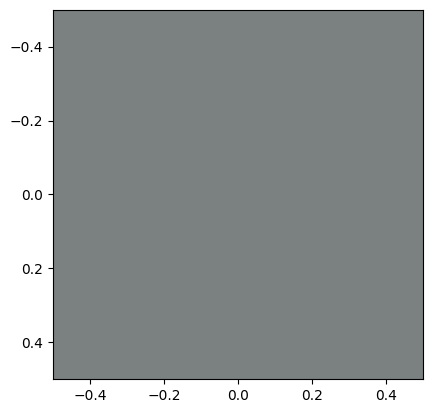

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


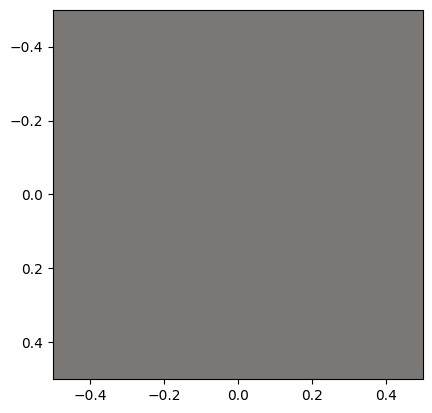

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


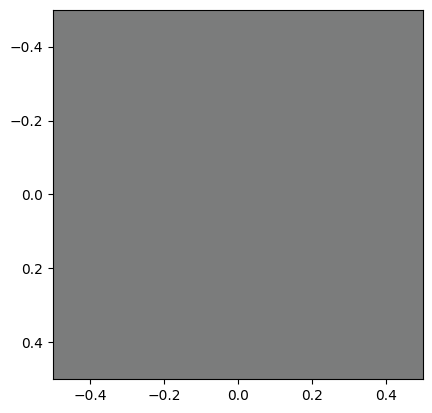

Area: 11
Procesando la región
Excentricidad de la region es: 0.6892428686457633
Paso el filtro de circularidad


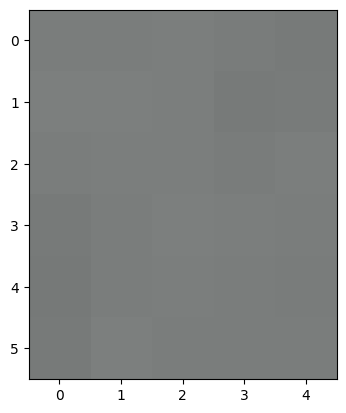

Area: 4
Procesando la región
Excentricidad de la region es: 0.9241763718304448
Paso el filtro de circularidad


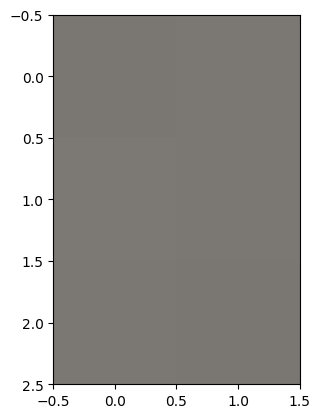

Area: 2
Procesando la región
Excentricidad de la region es: 1.0
Area: 3
Procesando la región
Excentricidad de la region es: 0.816496580927726
Paso el filtro de circularidad


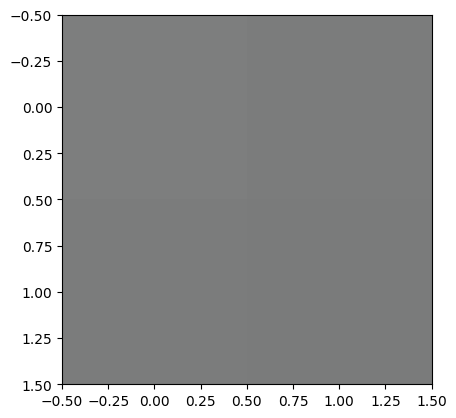

Area: 1
Procesando la región
Excentricidad de la region es: 0
Paso el filtro de circularidad


KeyboardInterrupt: ignored

<Figure size 640x480 with 0 Axes>

In [14]:
from skimage.measure import regionprops

a_min, a_max = np.pi*80**2, np.pi*150**2


for r in regionprops(im_labeled):
  print('Area: {}'.format(r.area))
  if (r.area < a_min or r.area > a_max):
    continue
  else:
    print('Procesando la región')
    print('Excentricidad de la region es: {}'.format(r.eccentricity))
    if (r.eccentricity < 0.5):
      print('Paso el filtro de circularidad')
      min_row, min_col, max_row, max_col = r.bbox
      plt.figure()
      plt.imshow(im[min_row:max_row, min_col:max_col])
      plt.show()